# Investigating some basic properties

The purpose of this notebook is to perform some basic exploratory analysis and to further clean the data in preparation for testing models and features.

In [1]:
from sqlalchemy import create_engine
from getpass import getpass, getuser
from os import listdir
from os.path import join
from pprint import pprint

import pandas as pd

pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
# Reading in data

# NOTE: If you want access, let me know, and I'll give you a username and password and you'd also want local to be false

def get_residential_df(table='complete_residential', local=True):
    """Returns the df that I'll be using to study features"""
    u = input('Database user:')
    p = getpass('Input database password')
    if local:
        url = '10.0.1.4'
    else:
        url = 'handelstaccato.homenet.org'
    engine_string = 'postgresql://{0}:{1}@{2}:5432/king_county'.format(u, p, url)
    engine = create_engine(engine_string)
    residential_q = (
        'SELECT * FROM project."{}";'.format(table)
    )
    return pd.read_sql(residential_q, engine, index_col='pin')

parcel = get_residential_df()

Database user:gavin
Input database password········


In [3]:
# Fix dates

DATE_COLS = [
    'sale_date',
    'appr_date'
]

def clean_dates(df, cols):
    for col in cols:
        try:
            df[col] = df[col].apply(pd.to_datetime)
            df[col] = pd.DatetimeIndex(df[col]).normalize()
        except:
            df[col] = pd.DatetimeIndex(df[col]).normalize()
    return df

parcel = clean_dates(parcel, DATE_COLS)

In [4]:
# Data basics
# A lot of possibly useful features

# The higher the value for the following indicates a better view:
# MtRainier, Olympics, Cascades, SeattleSkyline, PugetSound, LakeWashington, LakeSammamish

# Good sales have the following value for 'sale_reason': 1
# Bad codes: [10, 8, 13, 11, 18]

parcel[~parcel.sale_reason.isin([10, 8, 13, 11, 18])].head()

,Major,Minor,PropType,Area,DistrictName,ParcSqFtLot,CurrentZoning,Topography,StreetSurface,InadequateParking,PcntUnusable,MtRainier,Olympics,Cascades,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,HistoricSite,SteepSlopeHazard,WaterProblems,SqFtTotLiving,no_stories,bath_count,bedroom_count,year_built,year_renovated,heat_system,brick_stone,sq_ft_upper_floor,sale_date,sale_price,sale_reason,appr_land_val,appr_imprv_val,appr_tot_val,appr_date,major_str,minor_str,addr_full,landmarks_counts100,landmarks_counts1000,landmarks_counts20000,light_rail_counts100,light_rail_counts1000,light_rail_counts20000,parks_counts100,parks_counts1000,parks_counts20000,priv_school_counts100,priv_school_counts1000,priv_school_counts20000,pub_school_counts100,pub_school_counts1000,pub_school_counts20000
pin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3630150210,363015,210,R,75.0,ISSAQUAH,1560,UV,0,1,2,0,0,0,0,0,0,0,0,0,0,0,N,0,N,N,1320,2.0,2,3,2006,0,5,0,0,2004-12-07,2760000,1,282000,191000,473000,2016-08-23,363015,0210,1927 NE KENSINGTON CT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4036100060,403610,60,R,64.0,BELLEVUE,9488,R-5,0,1,2,0,0,0,0,0,0,0,0,0,0,0,N,0,N,N,2530,1.0,1,5,1966,0,5,0,0,2016-05-16,710000,1,318000,255000,573000,2016-08-23,403610,0060,11630 SE 47TH PL,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1623300305,162330,305,R,82.0,SEATTLE,3000,SF 5000,0,1,2,0,0,0,0,0,0,0,0,0,0,0,N,0,N,N,1290,1.0,1,2,1914,0,5,0,0,2003-08-11,388000,1,257000,355000,612000,2016-07-04,162330,0305,7016 6TH AVE NW,0,0,110,0,0,0,0,0,132,0,0,36,0,0,47
7632400400,763240,400,R,49.0,BURIEN,29982,RS-12000,0,1,0,0,0,2,0,0,2,0,0,0,0,0,N,0,N,N,3930,1.5,2,3,1941,0,5,0,0,2005-11-04,895000,1,258000,622000,880000,2016-09-07,763240,0400,16067 MAPLEWILD AVE SW,0,0,0,0,0,2,0,0,2,0,0,4,0,0,1
6163900152,616390,152,R,3.0,SHORELINE,7672,MUR-70,0,1,2,0,0,0,0,0,0,0,0,0,0,0,N,0,N,N,1100,1.0,1,2,1947,0,3,0,0,2005-10-17,239500,1,178000,99000,277000,2016-06-20,616390,0152,18302 9TH AVE NE,0,0,4,0,0,0,0,0,15,0,0,9,0,0,8


In [5]:
parcel.describe()

,Major,Minor,Area,ParcSqFtLot,Topography,StreetSurface,InadequateParking,PcntUnusable,MtRainier,Olympics,Cascades,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,LotDepthFactor,TrafficNoise,AirportNoise,HistoricSite,SqFtTotLiving,no_stories,bath_count,bedroom_count,year_built,year_renovated,heat_system,brick_stone,sq_ft_upper_floor,sale_price,sale_reason,appr_land_val,appr_imprv_val,appr_tot_val,landmarks_counts100,landmarks_counts1000,landmarks_counts20000,light_rail_counts100,light_rail_counts1000,light_rail_counts20000,parks_counts100,parks_counts1000,parks_counts20000,priv_school_counts100,priv_school_counts1000,priv_school_counts20000,pub_school_counts100,pub_school_counts1000,pub_school_counts20000
count,46924.000000,46924.000000,46924.000000,4.692400e+04,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.0,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,4.692400e+04,46924.000000,4.692400e+04,4.692400e+04,4.692400e+04,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000,46924.000000
mean,444596.977559,1636.403717,48.048994,2.317603e+04,0.086757,1.023037,1.186280,0.031114,0.028536,0.067918,0.079874,0.025957,0.072010,0.080620,0.019734,0.128953,0.219440,0.0,0.000746,2112.625820,1.469035,1.551573,3.373284,1969.494672,101.508567,4.830108,4.030326,10.254944,2.692685e+05,5.224469,2.596875e+05,3.168811e+05,5.765686e+05,0.001257,0.143914,47.093215,0.000021,0.001598,1.272568,0.001215,0.158576,39.116763,0.000426,0.053128,10.885496,0.000043,0.076741,13.816363
std,286566.624035,2924.829111,26.725599,1.159959e+05,0.281482,0.188659,0.982084,1.584176,0.285503,0.432384,0.448832,0.265852,0.446381,0.471239,0.245225,4.040940,0.575436,0.0,0.046389,997.805229,0.517670,0.689353,0.958281,29.263532,438.485885,0.940980,17.972155,88.140987,5.779793e+05,5.967480,3.500970e+05,3.412260e+05,6.151397e+05,0.042039,1.127991,145.558004,0.004616,0.043030,3.591310,0.039424,0.590454,87.244207,0.024424,0.314479,20.871602,0.006528,0.423724,24.194468
min,100.000000,1.000000,1.000000,5.870000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,1.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,198220.000000,120.000000,26.000000,5.547750e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1430.000000,1.000000,1.000000,3.000000,1950.000000,0.000000,5.000000,0.000000,0.000000,0.000000e+00,1.000000,1.120000e+05,1.710000e+05,3.160000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,381855.000000,340.000000,47.000000,7.949500e+03,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1938.000000,1.000000,1.000000,3.000000,1973.000000,0.000000,5.000000,0.000000,0.000000,1.595000e+05,1.000000,1.930000e+05,2.450000e+05,4.560000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,721577.250000,1075.000000,70.000000,1.155300e+04,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2580.000000,2.000000,2.000000,4.000000,1994.000000,0.000000,5.000000,0.000000,0.000000,3.380000e+05,10.000000,2.940000e+05,3.670000e+05,6.5

In [6]:
parcel.dtypes

Major                               int64
Minor                               int64
PropType                           object
Area                              float64
DistrictName                       object
ParcSqFtLot                         int64
CurrentZoning                      object
Topography                          int64
StreetSurface                       int64
InadequateParking                   int64
PcntUnusable                        int64
MtRainier                           int64
Olympics                            int64
Cascades                            int64
SeattleSkyline                      int64
PugetSound                          int64
LakeWashington                      int64
LakeSammamish                       int64
LotDepthFactor                      int64
TrafficNoise                        int64
AirportNoise                        int64
PowerLines                         object
HistoricSite                        int64
SteepSlopeHazard                  

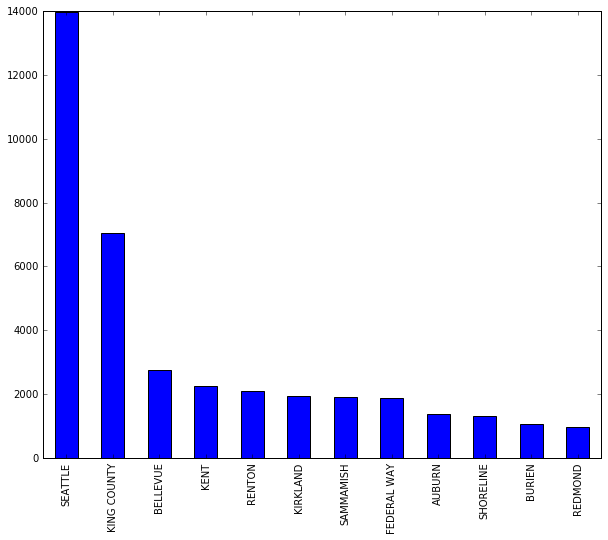

In [7]:
# Which districts are represented?

parcel.DistrictName.value_counts().head(12).plot(kind='bar', figsize=(10,8))

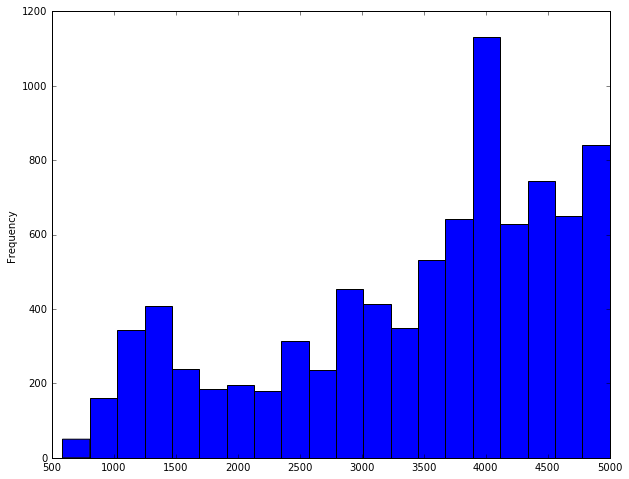

In [8]:
# How large is the entire lot in square feet?

parcel.loc[parcel.ParcSqFtLot < 5000, 'ParcSqFtLot'].plot(kind='hist', bins=20, figsize=(10, 8))

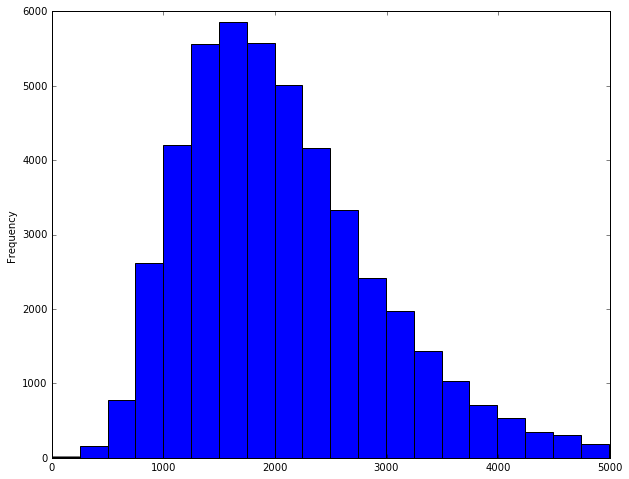

In [9]:
# How many square feet livable area?
# note that it's higher which is possible if most homes have more than 1 story.

parcel.loc[parcel.SqFtTotLiving < 5000, 'SqFtTotLiving'].plot(kind='hist', bins=20, figsize=(10, 8))

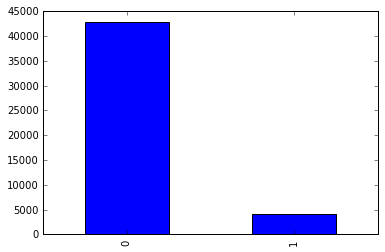

In [10]:
# This indicates whether the property is on a relatively steep gradient. Most are not.

parcel.Topography.value_counts().plot(kind='bar')

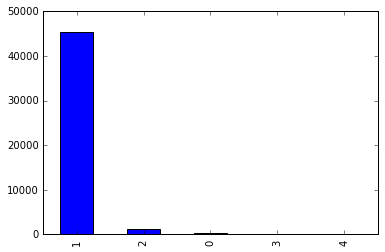

In [11]:
# as far as I can tell, the following seem to not convey any information:
# StreetSurface, InadequateParking, PcntUnusable

parcel.StreetSurface.value_counts().plot(kind='bar')

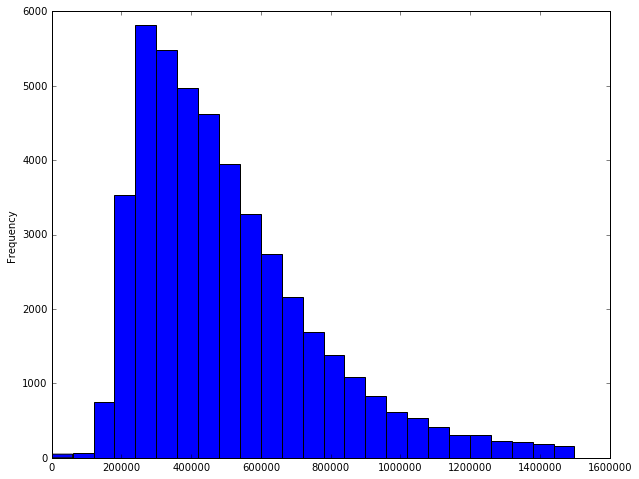

In [12]:
parcel.loc[parcel.appr_tot_val < 1500000, 'appr_tot_val'].plot(kind='hist', figsize=(10, 8), bins=25)

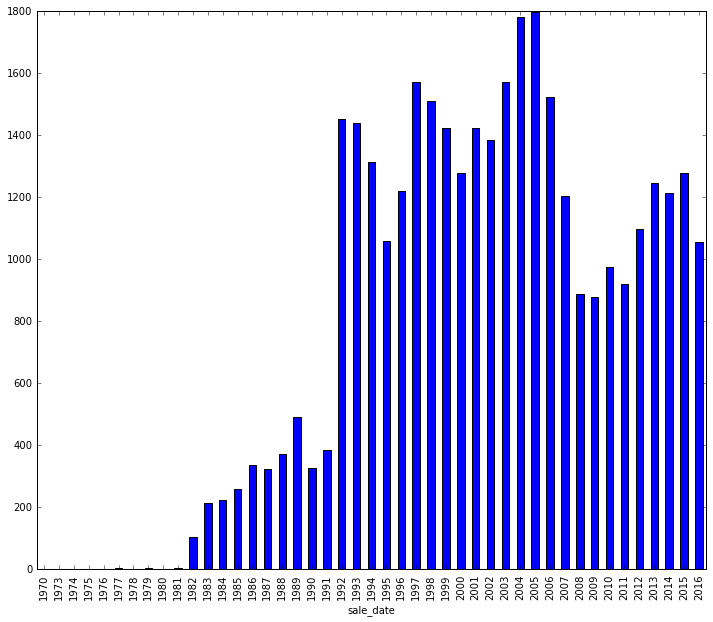

In [13]:
# Of the sales that were legit market value sales how are the dates of sale and value distributed?
condition = ~parcel.sale_reason.isin([10, 8, 13, 11, 18])
good_sale_parcels = parcel.loc[condition, :]

(
    good_sale_parcels
    .groupby(good_sale_parcels['sale_date'].dt.year)
    .sale_date
    .count()
    .plot(kind='bar', figsize=(12, 10))
)

# Sales exploded in 1992 for some reason and have been relatively high since

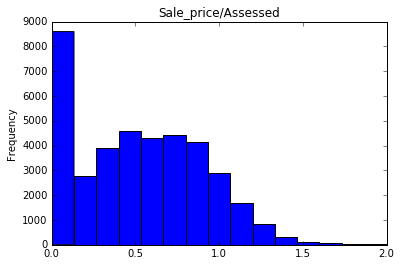

In [14]:
# Of sales over all time, how close on average are they to the assessor's estimate of total value?

(
    good_sale_parcels.sale_price
    .divide(good_sale_parcels[good_sale_parcels.appr_tot_val>0].appr_tot_val)
    .plot(kind='hist', xlim=(0, 2), bins=400, title='Sale_price/Assessed')
)

# There's a good amount of variation, so it's not clear from assessed value alone what a residence would sell for.
# There's also some confusion becuase the assessments are recent whereas we don't know when the sale occured.

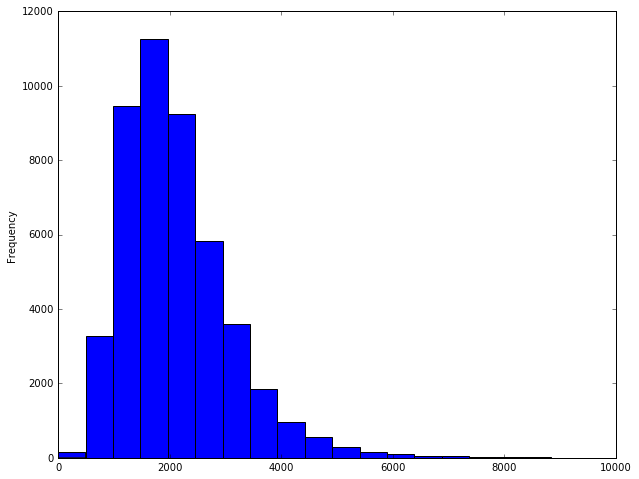

In [15]:
# median square footage hovers around 2,000

parcel.loc[parcel.SqFtTotLiving < 10000, 'SqFtTotLiving'].plot(kind='hist', bins=20, figsize=(10,8))

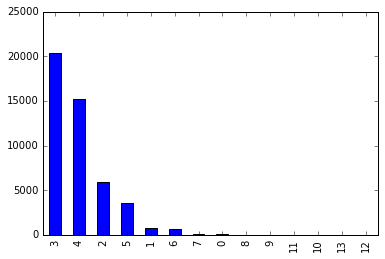

In [16]:
parcel.bedroom_count.value_counts().plot(kind='bar')

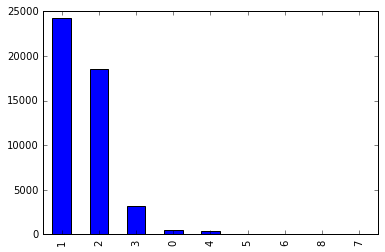

In [17]:
parcel.bath_count.value_counts().plot(kind='bar')

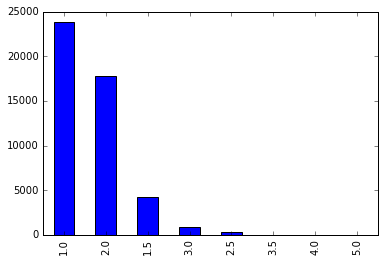

In [18]:
parcel.no_stories.value_counts().plot(kind='bar')

In [19]:
# Review what we have

for col in parcel.columns:
    dtype = parcel[col].dtype
    print(col, dtype, end='\n')
    if dtype in ['object', 'int64']:
        pprint(parcel[col].unique())
    print('\n')

Major int64
array([812110, 363015, 211370, ..., 932851, 326130, 139380])


Minor int64
array([ 155,  210,  355, ..., 1556, 7210, 1661])


PropType object
array(['R'], dtype=object)


Area float64


DistrictName object
array(['SEATTLE', 'ISSAQUAH', 'BELLEVUE', 'DES MOINES', 'BURIEN',
       'SHORELINE', 'KIRKLAND', 'RENTON', 'KING COUNTY', 'KENT', 'AUBURN',
       'SAMMAMISH', 'COVINGTON', 'BOTHELL', 'SeaTac', 'FEDERAL WAY',
       'MEDINA', 'REDMOND', 'MAPLE VALLEY', 'YARROW POINT', 'KENMORE',
       'ENUMCLAW', 'MERCER ISLAND', 'NEWCASTLE', 'BLACK DIAMOND',
       'SNOQUALMIE', 'HUNTS POINT', 'WOODINVILLE', 'LAKE FOREST PARK',
       'DUVALL', 'NORMANDY PARK', 'TUKWILA', 'CLYDE HILL', 'PACIFIC',
       'ALGONA', 'MILTON', 'NORTH BEND', 'CARNATION', 'SKYKOMISH',
       'BEAUX ARTS'], dtype=object)


ParcSqFtLot int64
array([ 2868,  1560,  4240, ..., 10964, 25050, 35178])


CurrentZoning object
array(['SF 5000', 'UV', 'R-5', 'RS-7200', 'RS-12000', 'MUR-70', 'RSA 6',
       'R-4', 'RA5',

In [20]:
# Finally, write the file to the shared_data directory, so it can be put online
location = '../shared_data'
parcel.to_pickle(join(location, 'parcel.pkl'))